In [1]:
import dicom
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dcm = dicom.read_file("RD1.3.6.1.4.1.2452.6.2531106079.1279520058.1467239866.3552174742.dcm", force=True)

In [3]:
def load_dose_from_dicom(dcm):
    pixels = np.transpose(
        dcm.pixel_array, (1, 2, 0))
    dose = pixels * dcm.DoseGridScaling
    
    return dose

def load_xyz_from_dicom(dcm):
    resolution = np.array(
        dcm.PixelSpacing).astype(float)
    dx = resolution[0]
    
    x = (
        dcm.ImagePositionPatient[0] + 
        np.arange(0, dcm.Columns * dx, dx))
    
    dy = resolution[1]
    y = (
        dcm.ImagePositionPatient[1] + 
        np.arange(0, dcm.Rows * dy, dy))
    
    z = (
        np.array(dcm.GridFrameOffsetVector) + 
        dcm.ImagePositionPatient[2])
    
    return x, y, z

In [6]:
dose = load_dose_from_dicom(dcm)
x, y, z = load_xyz_from_dicom(dcm)
len(z)

114

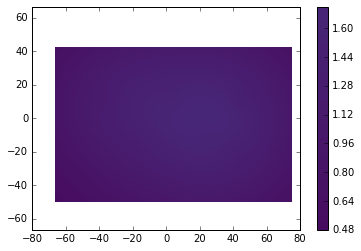

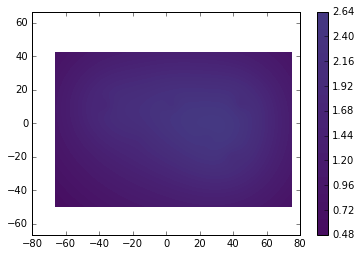

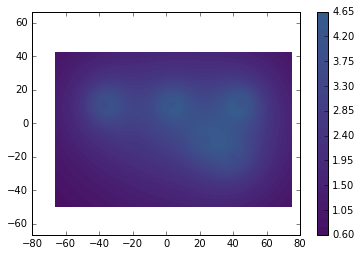

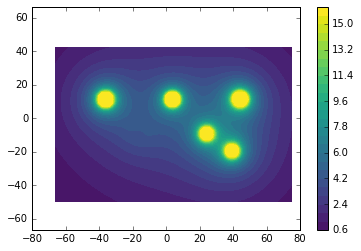

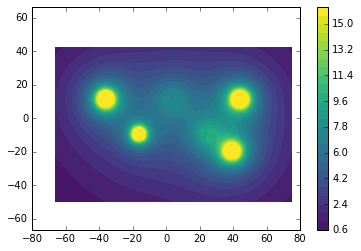

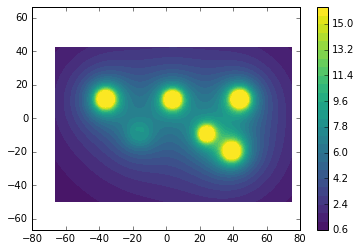

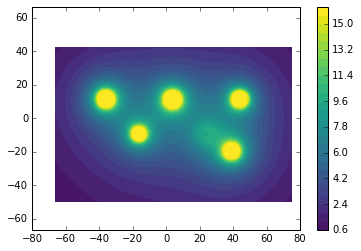

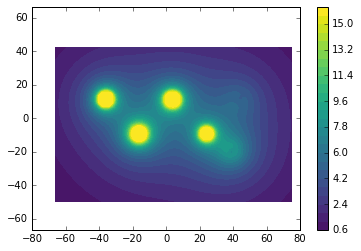

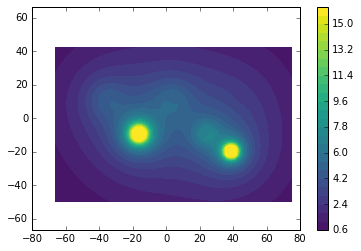

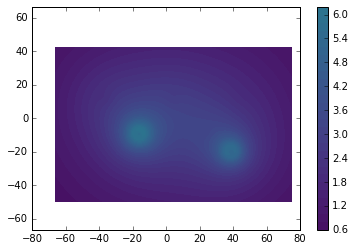

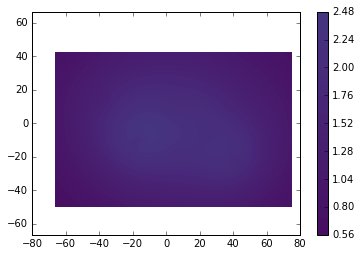

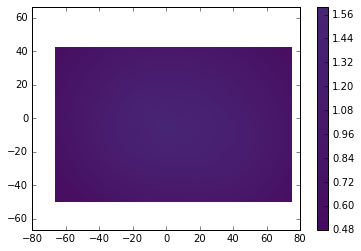

In [5]:
for i in np.arange(0,114,10):
    plt.contourf(
        x, y, dose[:, :, i], 30, 
        vmin=0, vmax=dose.max(), cmap=plt.get_cmap('viridis'))
    plt.colorbar()
    plt.axis("equal")
    plt.show()